In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from src import RGBNirDataModule

In [4]:
dm = RGBNirDataModule()
dm.setup()

train: 1587395
val: 40080
test: 36421


In [15]:
imgs, labels = next(iter(dm.train_dataloader(batch_size=25)))
imgs.shape, imgs.dtype, imgs.max(), imgs.min(), labels

(torch.Size([25, 256, 256, 4]),
 torch.uint8,
 tensor(255, dtype=torch.uint8),
 tensor(0, dtype=torch.uint8),
 tensor([ 7292,  1253,   125,  1001,  5416,   399, 10219,   196,   223,   438,
           533,   566,   870,   979,  8006,   444,   864,  7949,  2992,  5049,
          9017,   297,  5156,  6106,   389]))

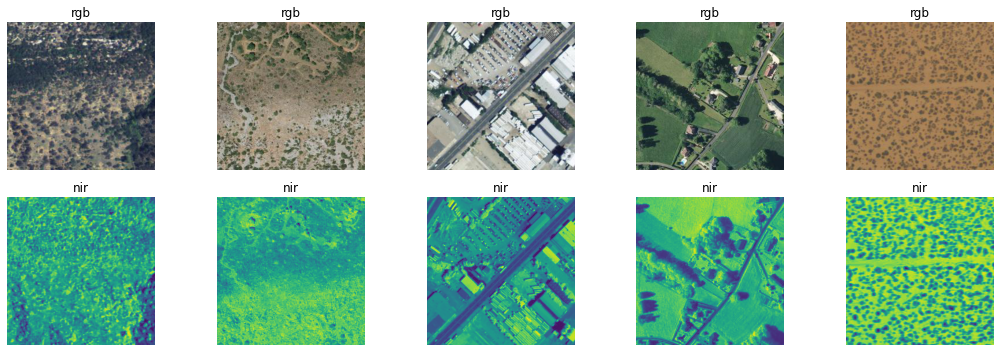

In [21]:
import matplotlib.pyplot as plt

# plot images in a 2x5 grid
fig = plt.figure(figsize=(15,5))
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    ax.imshow(imgs[i][...,:3])
    ax.set_title('rgb')
    ax.axis('off')
    ax = plt.subplot(2, 5, i+1+5)
    ax.set_title('nir')
    ax.imshow(imgs[i][...,3])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [24]:
from src import RGBNirModule

hparams = {
    'backbone': 'resnet18',
    'pretrained': True,
    'optimzier': 'Adam',
    'optimizer_params': {
        'lr': 1e-3
    }
}

module = RGBNirModule(hparams)
outputs = module(imgs)
outputs.shape

torch.Size([25, 17037])

In [26]:
import pytorch_lightning as pl

hparams = {
    'datamodule': {
        'batch_size': 64,
        'num_workers': 0,
        'pin_memory': False
    },
    'backbone': 'resnet18',
    'pretrained': True,
    'optimizer': 'Adam',
    'optimizer_params': {
        'lr': 1e-3
    }
}


dm = RGBNirDataModule(**hparams['datamodule'])
module = RGBNirModule(hparams)

trainer = pl.Trainer(
    gpus=[1],
    max_epochs=10,
    enable_checkpointing=False,
    logger=None,
    overfit_batches=1
)

trainer.fit(module, dm)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 19.9 M
---------------------------------
19.9 M    Trainable params
0         Non-trainable params
19.9 M    Total params
79.679    Total estimated model params size (MB)


train: 1587395
val: 40080
test: 36421


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]